# Example of the aitlas toolbox in the context of image segmentation

## Import the required packages

In [ ]:
from aitlas.datasets import GSFC_AI4QCDataset
from aitlas.models import DeepLabV3
from aitlas.models import DeepLabV3_13_bands
from aitlas.transforms import MinMaxNormTranspose
from aitlas.transforms import ResizeToTensor
from aitlas.utils import image_loader

## Visualize images and masks

In [18]:
dataset_config = {
    "data_dir": "/home/dragik/data/GSFC/new_data",
    "selection":"rgb"
}

dataset = GSFC_AI4QCDataset(dataset_config)

Total number of patches: 27


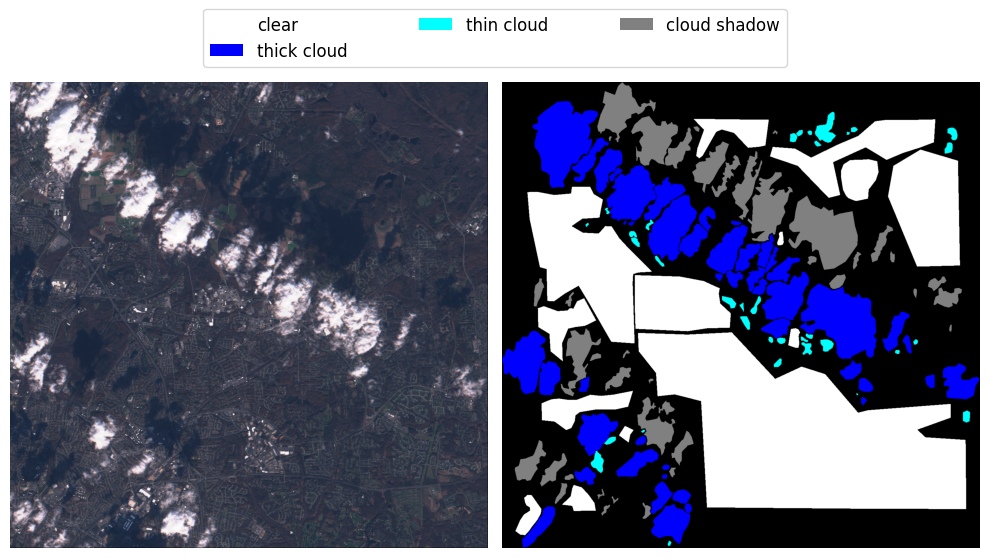

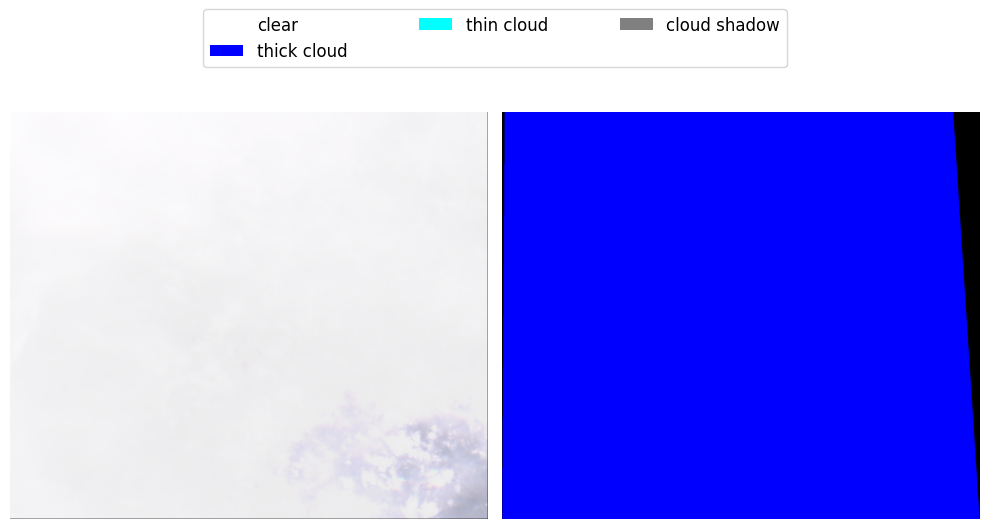

In [27]:
print(f"Total number of patches: {len(dataset)}")
dataset.show_image(8);
dataset.show_image(13);

In [6]:
dataset.data_distribution_table()

,Number of pixels
clear,17785609.0
thick cloud,21076090.0
thin cloud,6774723.0
cloud shadow,1193095.0


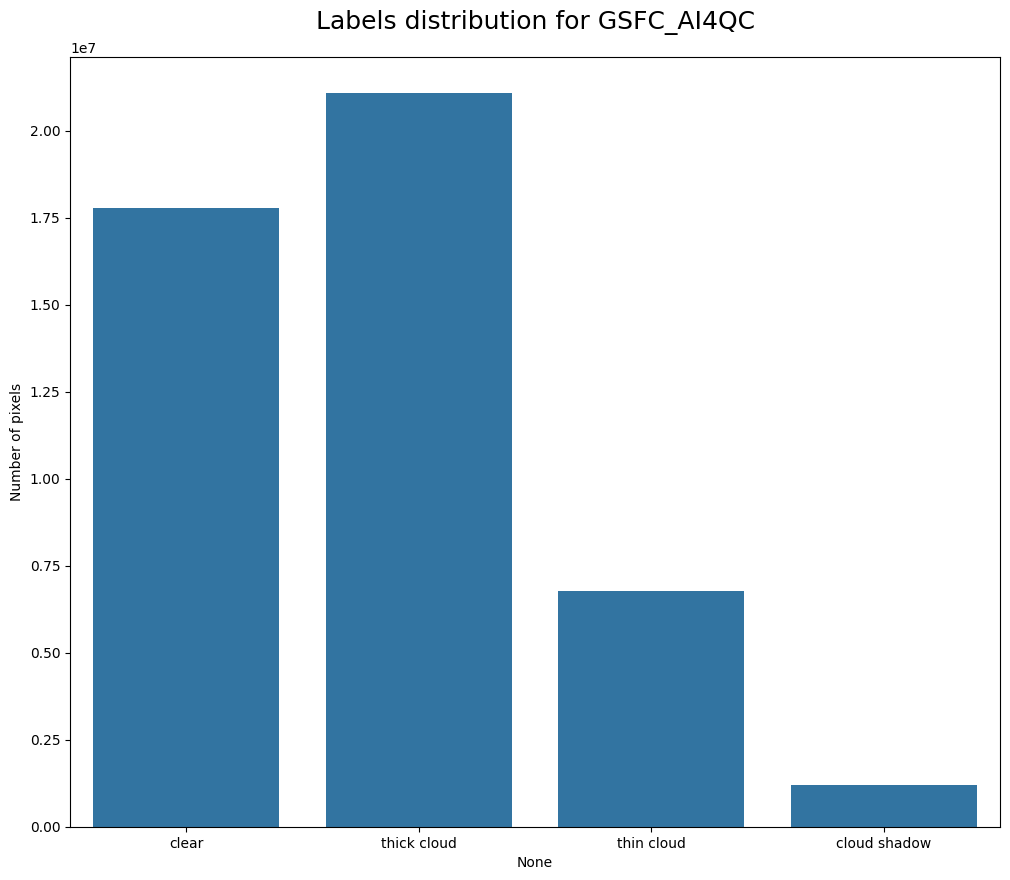

In [7]:
dataset.data_distribution_barchart();

# Working with Sentinel-2 true color RGB images

## Load training data

In [6]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 0,
    "data_dir": "/home/dragik/data/GSFC/new_data",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose","aitlas.transforms.ResizeToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"]
}
train_dataset = GSFC_AI4QCDataset(train_dataset_config)
len(train_dataset)

27

## Create the model

In [7]:
epochs = 5
model_directory = "/home/dragik/data/GSFC/experiments"
model_config = {
    "num_classes": 4, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [8]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.11it/s]

epoch: 1, time: 6, loss:  0.68545



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.22it/s]

IOU:0.2794862901699064, IOU mean:0.2550308589383562, IOU per Class:[0.51199806 0.41424806 0.08942625 0.00445107]



training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.43it/s]

epoch: 2, time: 5, loss:  0.65524



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.53it/s]

IOU:0.3512147891090842, IOU mean:0.32550506354035724, IOU per Class:[0.53331889 0.65379077 0.0919692  0.02294139]



training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]

epoch: 3, time: 5, loss:  0.60654



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.15it/s]

IOU:0.37884192541197825, IOU mean:0.36531362449811, IOU per Class:[0.61345952 0.69810369 0.13182216 0.01786912]



training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.22it/s]

epoch: 4, time: 5, loss:  0.58961



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.49it/s]

IOU:0.43262007335472663, IOU mean:0.42820977525307075, IOU per Class:[0.70250802 0.83244631 0.16211115 0.01577363]



training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.33it/s]

epoch: 5, time: 5, loss:  0.55093



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.47it/s]

IOU:0.5515502295579277, IOU mean:0.44673154860959247, IOU per Class:[0.68426831 0.83771286 0.26199464 0.00295037]


Train loss: [0.6588115162319608, 0.6091197155140065, 0.5535002372882984, 0.5242620883164583, 0.5205854508611891]
Validation loss: []
Train time per epochs: [6, 5, 5, 5, 5]
Finished training. training time: 26


# Working with the 13 bands of Sentinel-2

## Load training data

In [6]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 0,
    "selection":"all",
    "data_dir": "/home/dragik/data/GSFC/new_data",    
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"],
}
train_dataset = GSFC_AI4QCDataset(train_dataset_config)
len(train_dataset)

27

## Create the model

In [7]:
epochs = 5
model_directory = "/home/dragik/data/GSFC/experiments_all_bands"
model_config = {
    "num_classes": 4, 
    "learning_rate": 0.0001,
    "pretrained": False, 
    "threshold": 0.5,
    "metrics": ["iou"],
    "input_dim": 13
}

model = DeepLabV3_13_bands(model_config)
model.prepare()

## Start the training

In [8]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:19<00:00,  2.73s/it]

epoch: 1, time: 19, loss:  0.63092



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:17<00:00,  2.48s/it]

IOU:0.19598903284436647, IOU mean:0.11464777650109943, IOU per Class:[0.        0.3814912 0.0770999 0.       ]



training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:18<00:00,  2.61s/it]

epoch: 2, time: 18, loss:  0.56695



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:18<00:00,  2.59s/it]

IOU:0.20862337636894918, IOU mean:0.11310723253253889, IOU per Class:[0.         0.3814912  0.07093773 0.        ]



training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:19<00:00,  2.77s/it]

epoch: 3, time: 19, loss:  0.50882



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:17<00:00,  2.57s/it]

IOU:0.2361785393744189, IOU mean:0.11548663656590746, IOU per Class:[0.         0.3814912  0.08045534 0.        ]



training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:18<00:00,  2.69s/it]

epoch: 4, time: 19, loss:  0.53491



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:17<00:00,  2.56s/it]

IOU:0.20557328890860455, IOU mean:0.11466762522978304, IOU per Class:[0.        0.3814912 0.0771793 0.       ]



training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:19<00:00,  2.77s/it]

epoch: 5, time: 19, loss:  0.52047



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:18<00:00,  2.67s/it]

IOU:0.25296309768608904, IOU mean:0.10056475870739409, IOU per Class:[0.         0.3814912  0.02076783 0.        ]


Train loss: [0.6925058629777696, 0.6849358081817627, 0.6785856971034298, 0.67830698578446, 0.6461114397755375]
Validation loss: []
Train time per epochs: [19, 18, 19, 19, 19]
Finished training. training time: 94
